In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Reading dataset
dataset = pd.read_csv("./Position_Salaries.csv")

In [3]:
# Showing first 5 columns
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
# Taking independant variables
X = dataset.iloc[:,1:2].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [5]:
# Taking Dependant variable
Y = dataset.iloc[:,2:3].values
Y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [6]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_Y = StandardScaler()
Y = sc_Y.fit_transform(Y)
Y

/home/rishi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [7]:
#Fitting the SVM model
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,Y)

/home/rishi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

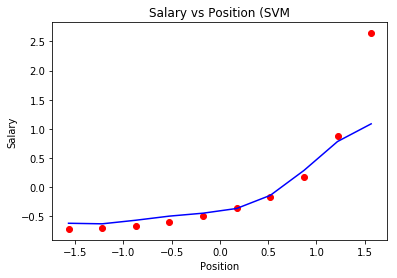

In [8]:
#Plotting the charts
plt.scatter(X,Y,color='red')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.title('Salary vs Position (SVM')
plt.plot(X,regressor.predict(X),color='blue')
plt.show()

In [9]:
#Predicting values
"""Transform the value for prediction into an array and then transform it and then
inversing it."""
sc_Y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))

array([170370.0204065])